### Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

### Load data from UCI database

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'

cols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'bk', 'lstat', 'medv']

df = pd.read_csv (url, header=None, names = cols, delim_whitespace=True)

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,bk,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Create input variable matrix X and dependent variable y

In [3]:
# take 'rm' & 'age' as inputs, 'medv' as dependent

X = df.loc[:, ['rm', 'age']].values
X = (X-X.mean(axis = 0)) / (X.max(axis = 0) - X.min(axis = 0)) # normalize
X = np.column_stack((np.ones(len(X)), X)) # append 1 for intercept
y = df.medv.values

### Codes for algorithm

In [4]:
# define gradient descent

def gradient_descent(X, y,  lr  = 0.1, n = 10000):
    
    m = len(y)
    
    theta = np.random.randn(X.shape[1])
    cost_history = np.zeros(n)
    theta_history = np.zeros([len(theta), n])

    
    for i in range(n):        
        
        loss = X.dot(theta) - y
        cost = np.sum(loss ** 2) / (2 * m)

        theta = theta - lr * X.T.dot(loss) / m
        
#         for j in range(len(theta)):
            
#             theta[j] = theta[j] - lr * X[:, j].dot(loss) / m
            
            
        cost_history[i] = cost
        theta_history[:, i] = theta
        
    return theta, cost_history, theta_history

### Test Results

In [5]:
# analytic solution

best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
best

array([22.53280632, 43.84785241, -7.0666259 ])

In [6]:
# loss with best coeffs

np.sum(np.square((X.dot(best) - y))) / (len(y)*2)

19.826967729550837

In [7]:
theta_final, cost_hist, theta_hist = gradient_descent(X, y)

In [8]:
theta_final

array([22.53280632, 43.84785021, -7.06662621])

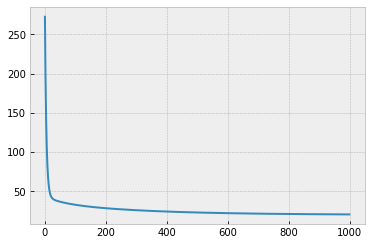

In [11]:
plt.plot(cost_hist[:1000])

In [10]:
# sklearn verification

lr = LinearRegression(fit_intercept=True)
lr.fit(X[:, 1:3], y)
lr.intercept_, lr.coef_

(22.532806324110677, array([43.84785241, -7.0666259 ]))